## Visualization for task 3.1

In [1]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

y_list = ['A','B','C','D','E','F','G','H','I','J'] 
x_list = ['0','1','2','3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24','25','26','27','28','29','30',
          '31','32','33','34','35','36','37','38','39','40']
CHIP_LIST_YX = []
for y in range(len(y_list)):
    for x in range(len(x_list)):
        chip_ID = y_list[y]+x_list[x]
        CHIP_LIST_YX.append(chip_ID)
        
CHIP_LIST_XY = []
for x in range(len(x_list)):
    for y in range(len(y_list)):
        chip_ID = y_list[y]+x_list[x]
        CHIP_LIST_XY.append(chip_ID)

def cal_chip_dist():     
    def single_chip_dist(chip1, chip2):
        dist1 = ord(chip1[0])-ord(chip2[0])
        dist2 = ord(chip1[1])-ord(chip2[1])
        return np.sqrt((dist1)**2+(dist2)**2)
    
    CHIP_DIST_LIST_YX = []
    CHIP_DIST_LIST_XY = []
    for i in range(410):
        for j in range(i):
            tmp_dist_yx = single_chip_dist(CHIP_LIST_YX[i],CHIP_LIST_YX[j])
            tmp_dist_xy = single_chip_dist(CHIP_LIST_XY[i],CHIP_LIST_XY[j])
            CHIP_DIST_LIST_YX.append(tmp_dist_yx)
            CHIP_DIST_LIST_XY.append(tmp_dist_xy)
    return CHIP_DIST_LIST_YX, CHIP_DIST_LIST_XY

CHIP_DIST_LIST_YX, CHIP_DIST_LIST_XY = cal_chip_dist()

def cal_term_dist(term_list):
    def single_term_dist(term1, term2):
        return (term1[0]==term2[0])+(term1[1]==term2[1])
    
    term_dist_list = []
    for i in range(410):
        for j in range(i):
            tmp_dist_terms = single_term_dist(term_list[i],term_list[j])
            term_dist_list.append(tmp_dist_terms)
    return term_dist_list

def cal_topsim(chip_dist_list, term_dist_list):
    return spearmanr(chip_dist_list, term_dist_list)[0]

def get_topsim_incons_wordtype_for_lang(data_lang, xy_or_yx='yx'):
    if xy_or_yx == 'yx':
        CHIP_LIST = CHIP_LIST_YX
        CHIP_DIST_LIST = CHIP_DIST_LIST_YX
    elif xy_or_yx == 'xy':
        CHIP_LIST = CHIP_LIST_XY
        CHIP_DIST_LIST = CHIP_DIST_LIST_XY
    else:
        print('please make sure whether xy or yx')
    total_cnts = 0
    inconsist_cnts = 0
    term_list = []
    term = 'AA'
    for chip in CHIP_LIST:
        chip_ID = chip
        mask = data_lang['chip_ID']==chip_ID
        if mask.sum()!=0:
            tmp_term_counts = data_lang[mask]['response_term'].value_counts()
            tmp_total_cnts = tmp_term_counts.values.sum()
            total_cnts += tmp_total_cnts
            inconsist_cnts += (tmp_total_cnts-tmp_term_counts.values[0])
            term = tmp_term_counts.keys()[0]
            if len(term)==1:
                term = term+term
            term_list.append(term)
        else:
            term_list.append(term)
    
    term_dist_list = cal_term_dist(term_list)
    tmp_topsim = cal_topsim(CHIP_DIST_LIST, term_dist_list)
    incons = inconsist_cnts/total_cnts
    wordtype = len(set(term_list))
    return tmp_topsim, incons, wordtype

In [2]:
data_origin = {'language_ID': [],
              'speaker_ID':[],
              'response_ID':[],
              'response_term':[],
              'chip_ID':[]}
with open('foci-exp.txt','r') as f:
    for line in f:
        line_content = line.split()
        data_origin['language_ID'].append(line_content[0])
        data_origin['speaker_ID'].append(line_content[1])
        data_origin['response_ID'].append(line_content[2])
        data_origin['response_term'].append(line_content[3])
        data_origin['chip_ID'].append(line_content[4])

data_df = pd.DataFrame(data_origin)

# ================= Some fundamental observations on data for one langauge ====
file_name = 'lang_stats_yx.txt'

with open(file_name,'a') as f:
    f.write('lang'+'\t'+'topsim'+'\t\t'+'incons'+'\t\t'+'wordtype'+'\n')
    
langID_all = []
top_sim_all = []
incons_all = []
wordtype_all = []
for i in range(110):
    print(i)
    data_lang = data_df[data_df['language_ID']==str(i+1)]
    top_sim, incons, wordtype = get_topsim_incons_wordtype_for_lang(data_lang,'yx')
    with open(file_name,'a') as f:
        f.write("%d\t%5f\t%5f\t%d\n"%(i,top_sim,incons,wordtype))
    langID_all.append(i)
    top_sim_all.append(top_sim)
    incons_all.append(incons)
    wordtype_all.append(wordtype)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [3]:
import copy
tmp_topsim = copy.deepcopy(top_sim_all)
tmp_topsim = np.asarray(tmp_topsim)

tmp_incons = copy.deepcopy(incons_all)
tmp_incons = np.asarray(tmp_incons)
incons_sort = tmp_incons[tmp_incons.argsort()]


sort_index = tmp_topsim.argsort()
top_sim_sort = tmp_topsim[tmp_topsim.argsort()]


/home/joshua/.conda/envs/beta_vae/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


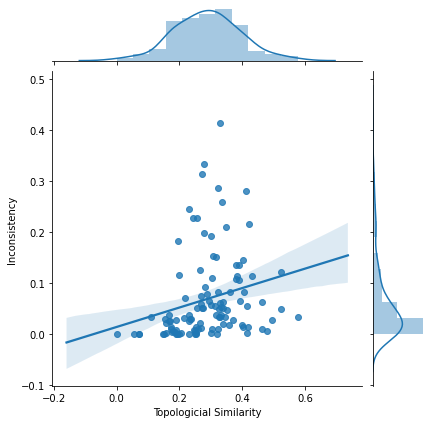

In [4]:
# ================= Draw figures ===============================

topsim_array = np.asarray(top_sim_all).reshape(-1,1)-np.min(top_sim_all)
incons_array = np.asarray(incons_all).reshape(-1,1)
wordty_array = np.asarray(wordtype_all).reshape(-1,1)
three_attris = pd.DataFrame(np.concatenate((topsim_array,incons_array,wordty_array),1),
                             columns = ["Topologicial Similarity", "Inconsistency","Term Types"])
three_attris_sort =three_attris.sort_index(axis=0,ascending=True,by=['Term Types'])

# ============== 311, 321 ===============================
sns.jointplot(x='Topologicial Similarity', y='Inconsistency', data=three_attris, kind='reg')

Text(0, 0.5, 'Inconsistency')

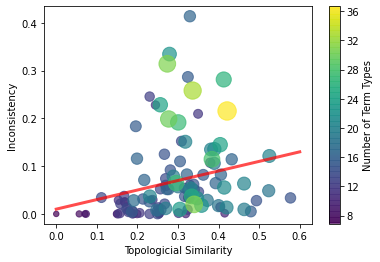

In [5]:
fig = plt.scatter(three_attris_sort['Topologicial Similarity'],three_attris_sort['Inconsistency'], 
            c=three_attris_sort['Term Types']/34, 
            s=three_attris_sort['Term Types']*10,
            alpha = 0.7)

cb = plt.colorbar(fig)
cb.set_label('Number of Term Types')
cb.set_ticks(np.linspace(0,6))  
cb.set_ticklabels( ('4','8','12','16','20','24','28','32','36'))
plt.plot([0,0.6],[0.01,0.13],color='red',linewidth=3,alpha=0.7)
plt.xlabel('Topologicial Similarity')
plt.ylabel('Inconsistency')

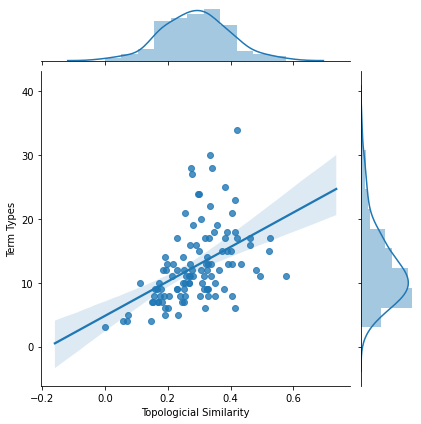

In [6]:
sns.jointplot(x="Topologicial Similarity", y="Term Types", data=three_attris, kind='reg')

Text(0, 0.5, 'Term Types')

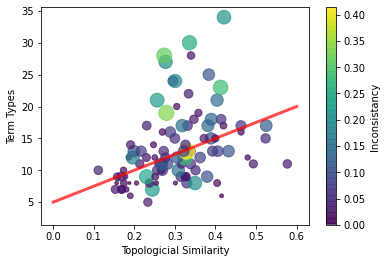

In [7]:
fig = plt.scatter(three_attris_sort['Topologicial Similarity'],three_attris_sort['Term Types'], 
            c=three_attris_sort['Inconsistency'], 
            s=np.sqrt(three_attris_sort['Inconsistency'])*400,
            alpha = 0.7)
cb = plt.colorbar(fig)
cb.set_label('Inconsistancy')
plt.plot([0,0.6],[5,20],color='red',linewidth=3,alpha=0.7)
plt.xlabel('Topologicial Similarity')
plt.ylabel('Term Types')

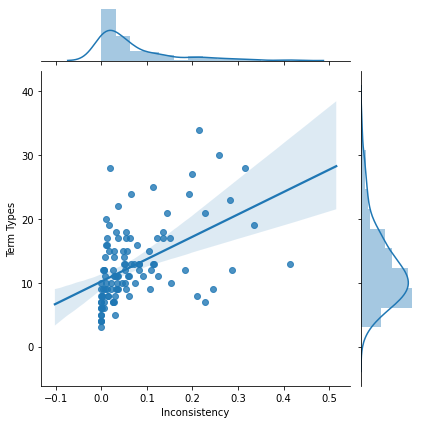

In [8]:
sns.jointplot(x="Inconsistency", y="Term Types", data=three_attris, kind='reg')

Text(0, 0.5, 'Term Types')

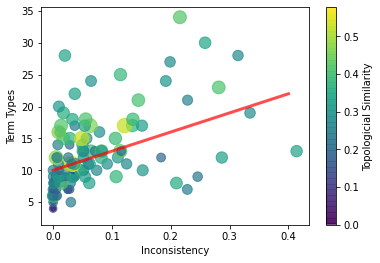

In [9]:
fig = plt.scatter(three_attris_sort['Inconsistency'],three_attris_sort['Term Types'], 
            c=three_attris_sort['Topologicial Similarity'], 
            s=three_attris_sort['Topologicial Similarity']*400,
            alpha = 0.7)
cb = plt.colorbar(fig)
cb.set_label('Topologicial Similarity')
plt.plot([0,0.4],[10,22],color='red',linewidth=3,alpha=0.7)
plt.xlabel('Inconsistency')
plt.ylabel('Term Types')